In [1]:
import pandas as pd
import numpy as np

In [55]:
# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv('Reddit_Data.csv')
df.columns=["reddit","class"]
print(df.head())
print(df.columns)
df.info()

                                              reddit  class
0   family mormon have never tried explain them t...      1
1  buddhism has very much lot compatible with chr...      1
2  seriously don say thing first all they won get...     -1
3  what you have learned yours and only yours wha...      0
4  for your own benefit you may want read living ...      1
Index(['reddit', 'class'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reddit  37149 non-null  object
 1   class   37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [3]:
df.head()

,reddit,class
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


 1    15830
 0    13142
-1     8277
Name: class, dtype: int64


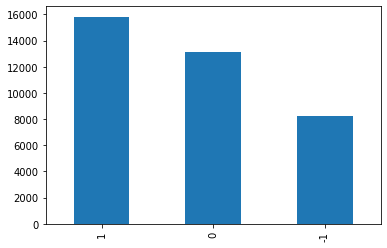

In [5]:
df['class'].value_counts().plot(kind='bar')
print(df['class'].value_counts())

In [6]:
print(df.shape)
df.dropna(axis = 0, inplace = True)
print(df.shape)
df.head()

(37249, 2)
(37149, 2)


,reddit,class
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [10]:
print(df.iloc[22]['reddit'])

cliche but you can wrong with cyric mean was mortal who just nabbed all when got the chance you gotta respect that


In [8]:
df['reddit'] = df['reddit'].replace(r'http[s]*:\/\/.*|<[^<>]*>|@[^\s]+|[!"$%&()*+,./:;<=>?@[\]^_`{|}~]', ' ', regex=True)
df['reddit'] = df['reddit'].replace(r'\s\s+', ' ', regex=True)
df['reddit'] = df['reddit'].replace(r'\s$|^\s', '', regex=True)
df['reddit'] = df['reddit'].replace(r'[^a-zA-Z_ ]+', '', regex=True)
df['reddit'] = df['reddit'].str.lower()

In [12]:
print(df.iloc[22]['reddit'])

cliche but you can wrong with cyric mean was mortal who just nabbed all when got the chance you gotta respect that


### **Lemmatization and stopword removal**

In [57]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords

stopwords_nltk = set(stopwords.words('english'))
from sklearn.feature_extraction import text

lemmatizer = WordNetLemmatizer()

def lemmatise(x):
  try:
    tokens = word_tokenize(x)
    return " ".join([lemmatizer.lemmatize(token) for token in tokens])
  except:
    return

def remove_stopwords(s):
    s = ' '.join(word for word in s.split() if word not in stopwords_nltk)
    return s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **Remove stop words**

In [16]:
for reddit in df.reddit.values:
  reddit = lemmatise(reddit)
df.loc[:,"reddit"] = df.reddit.apply(lambda x: remove_stopwords(x))

In [59]:
print(df.iloc[22]['reddit'])

 cliche but you can wrong with cyric mean was mortal who just nabbed all when got the chance you gotta respect that 


### **Data Splitting**

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2)
y_train = X_train['class']
X_train = X_train.drop(['class'], axis = 1)
y_test = X_test['class']
X_test = X_test.drop(['class'], axis = 1)

In [19]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
vocab = set()
max_length = -1
len_of_sent = []
for tweet in X_train.reddit.values:
  tokens = word_tokenize(tweet.strip())
  max_length = max(max_length, len(tokens))
  len_of_sent.append(len(tokens))
  vocab = vocab.union(set(tokens))
vocab_len = len(vocab)
print(len(vocab))
print(max_length)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
45398
872


### **Models using tfIdf**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_train = []
tfidf_train=vectorizer.fit_transform(X_train["reddit"].values.tolist())
tfidf_test=[]
tfidf_test=vectorizer.transform(X_test["reddit"].values.tolist())

### **Lr using tfIdf**

In [21]:
accuracylr=[]
f1scorelr=[]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report
lr=LogisticRegression(max_iter=10000)
lr.fit(tfidf_train,y_train)
y_pred=lr.predict(tfidf_test)

In [22]:
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average="weighted"))
print(classification_report(y_pred,y_test))
accuracylr.append(accuracy_score(y_pred,y_test))
f1scorelr.append(f1_score(y_pred,y_test,average="weighted"))

0.8398384925975774
0.8450907133054233
              precision    recall  f1-score   support

          -1       0.61      0.87      0.72      1138
           0       0.95      0.82      0.88      3063
           1       0.87      0.85      0.86      3229

    accuracy                           0.84      7430
   macro avg       0.81      0.85      0.82      7430
weighted avg       0.86      0.84      0.85      7430



### **dt using tfIdf**

In [23]:
accuracydt=[]
f1scoredt=[]
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(tfidf_train,y_train)
y_pred=dt.predict(tfidf_test)

In [24]:
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average="weighted"))
print(classification_report(y_pred,y_test))
accuracydt.append(accuracy_score(y_pred,y_test))
f1scoredt.append(f1_score(y_pred,y_test,average="weighted"))

0.7995962314939434
0.8014698013438668
              precision    recall  f1-score   support

          -1       0.62      0.66      0.64      1524
           0       0.91      0.87      0.89      2762
           1       0.80      0.81      0.80      3144

    accuracy                           0.80      7430
   macro avg       0.78      0.78      0.78      7430
weighted avg       0.80      0.80      0.80      7430



### **SVM using tfidf**

In [25]:
accuracysvm=[]
f1scoresvm=[]
from sklearn import svm
svc = svm.SVC()
svc.fit(tfidf_train, y_train)
y_pred=svc.predict(tfidf_test)

In [26]:
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average="weighted"))
print(classification_report(y_pred,y_test))
accuracysvm.append(accuracy_score(y_pred,y_test))
f1scoresvm.append(f1_score(y_pred,y_test,average="weighted"))

0.8358008075370121
0.8424573516153098
              precision    recall  f1-score   support

          -1       0.58      0.88      0.70      1071
           0       0.96      0.80      0.88      3158
           1       0.86      0.85      0.86      3201

    accuracy                           0.84      7430
   macro avg       0.80      0.84      0.81      7430
weighted avg       0.86      0.84      0.84      7430



### **RandomForest using tfidf**

In [27]:
accuracyrf=[]
f1scorerf=[]
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(tfidf_train,y_train)
y_pred=rf.predict(tfidf_test)

In [28]:
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average="weighted"))
print(classification_report(y_pred,y_test))
accuracyrf.append(accuracy_score(y_pred,y_test))
f1scorerf.append(f1_score(y_pred,y_test,average="weighted"))

0.819650067294751
0.8342991155417667
              precision    recall  f1-score   support

          -1       0.44      0.91      0.60       798
           0       0.95      0.85      0.90      2945
           1       0.90      0.78      0.84      3687

    accuracy                           0.82      7430
   macro avg       0.77      0.84      0.78      7430
weighted avg       0.87      0.82      0.83      7430



### **Models using word2vec**

In [29]:
import pickle as pkl
EMBEDDING_FILE = "/content/drive/My Drive/SentimentAnalysisDMTM/w2v.pkl"
def load_w2v(filepath):
    with open(filepath, 'rb') as fin:
        return pkl.load(fin)
word2vec = load_w2v(EMBEDDING_FILE)

In [30]:
def get_tokens(inp_str):
    return inp_str.split()

no_embed = set()
def w2v(token):
    word_vector = np.zeros(300,)
    if token in word2vec:
      word_vector=word2vec[token]
    else: 
      no_embed.add(token)
    return word_vector

def string2vec(user_input):
    if len(user_input)==0:
      return np.zeros(300,)
    embedding = np.zeros(300,)
    tokens=get_tokens(user_input)
    for i in tokens:
      embedding+=w2v(i)
    embedding/=len(user_input)
    return embedding

def train_model(user_input):
  training_data=[]
  for i in user_input:
    embedding=string2vec(i)
    training_data.append(embedding)
  return training_data

def test_model(user_input):
  test_data=[]
  for i in user_input:
    embedding=string2vec(i)
    test_data.append(embedding)
  return test_data
training_data=train_model(X_train["reddit"].values.tolist())
test_data=test_model(X_test["reddit"].values.tolist())

In [31]:
print(len(no_embed))

36088


In [32]:
len(training_data[0])

300

### **lr using word2vec**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report

lr=LogisticRegression(max_iter=10000)
lr=lr.fit(training_data,y_train)
y_pred=lr.predict(test_data)

In [34]:
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average="weighted"))
print(classification_report(y_pred,y_test))
accuracylr.append(accuracy_score(y_pred,y_test))
f1scorelr.append(f1_score(y_pred,y_test,average="weighted"))

0.5823687752355317
0.6378256798638692
              precision    recall  f1-score   support

          -1       0.06      0.56      0.10       163
           0       0.63      0.62      0.62      2654
           1       0.82      0.56      0.67      4613

    accuracy                           0.58      7430
   macro avg       0.50      0.58      0.46      7430
weighted avg       0.73      0.58      0.64      7430



## **dt using word2vec**

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(training_data,y_train)
y_pred=dt.predict(test_data)

In [36]:
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average="weighted"))
print(classification_report(y_pred,y_test))
accuracydt.append(accuracy_score(y_pred,y_test))
f1scoredt.append(f1_score(y_pred,y_test,average="weighted"))

0.5203230148048452
0.5200339431204515
              precision    recall  f1-score   support

          -1       0.31      0.31      0.31      1660
           0       0.61      0.58      0.60      2769
           1       0.55      0.58      0.57      3001

    accuracy                           0.52      7430
   macro avg       0.49      0.49      0.49      7430
weighted avg       0.52      0.52      0.52      7430



### **svm using word2vec**

In [37]:
from sklearn import svm
svc = svm.SVC()
svc.fit(training_data, y_train)
y_pred=svc.predict(test_data)

In [38]:
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average="weighted"))
print(classification_report(y_pred,y_test))
accuracysvm.append(accuracy_score(y_pred,y_test))
f1scoresvm.append(f1_score(y_pred,y_test,average="weighted"))

0.6720053835800808
0.6984343223740571
              precision    recall  f1-score   support

          -1       0.24      0.64      0.35       599
           0       0.80      0.70      0.75      2996
           1       0.79      0.66      0.72      3835

    accuracy                           0.67      7430
   macro avg       0.61      0.67      0.60      7430
weighted avg       0.75      0.67      0.70      7430



### **random forest using word2vec**

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(training_data,y_train)
y_pred=rf.predict(test_data)

In [40]:
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average="weighted"))
print(classification_report(y_pred,y_test))
accuracyrf.append(accuracy_score(y_pred,y_test))
f1scorerf.append(f1_score(y_pred,y_test,average="weighted"))

0.6332436069986541
0.6756673259128115
              precision    recall  f1-score   support

          -1       0.12      0.57      0.20       349
           0       0.77      0.67      0.72      3053
           1       0.78      0.61      0.69      4028

    accuracy                           0.63      7430
   macro avg       0.56      0.62      0.53      7430
weighted avg       0.75      0.63      0.68      7430



### **Glove Embedding**

In [41]:
embeddings_index = dict()
f = open('/content/drive/My Drive/SentimentAnalysisDMTM/glove.twitter.27B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 1193514 word vectors.


In [42]:
def get_tokens(inp_str):
    return inp_str.split()

no_embed = set()
def w2v(token):
    word_vector = np.zeros(50,)
    if token in embeddings_index:
      word_vector=embeddings_index[token]
    else: 
      no_embed.add(token)
    return word_vector

def string2vec(user_input):
    if len(user_input)==0:
      return np.zeros(50,)
    embedding = np.zeros(50,)
    tokens=get_tokens(user_input)
    for i in tokens:
      embedding+=w2v(i)
    embedding/=len(user_input)
    return embedding

def train_model(user_input):
  training_data=[]
  for i in user_input:
    embedding=string2vec(i)
    training_data.append(embedding)
  return training_data

def test_model(user_input):
  test_data=[]
  for i in user_input:
    embedding=string2vec(i)
    test_data.append(embedding)
  return test_data
training_data=train_model(X_train["reddit"].values.tolist())
test_data=test_model(X_test["reddit"].values.tolist())

In [43]:
print(len(no_embed))

14455


### **lr using glove embedding**

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report

lr=LogisticRegression(max_iter=10000)
lr=lr.fit(training_data,y_train)
y_pred=lr.predict(test_data)

In [45]:
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average="weighted"))
print(classification_report(y_pred,y_test))
accuracylr.append(accuracy_score(y_pred,y_test))
f1scorelr.append(f1_score(y_pred,y_test,average="weighted"))

0.5973082099596232
0.6219155232732457
              precision    recall  f1-score   support

          -1       0.22      0.52      0.30       678
           0       0.59      0.65      0.62      2398
           1       0.80      0.58      0.68      4354

    accuracy                           0.60      7430
   macro avg       0.53      0.58      0.53      7430
weighted avg       0.68      0.60      0.62      7430



### **dt using glove**

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(training_data,y_train)
y_pred=dt.predict(test_data)

In [47]:
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average="weighted"))
print(classification_report(y_pred,y_test))
accuracydt.append(accuracy_score(y_pred,y_test))
f1scoredt.append(f1_score(y_pred,y_test,average="weighted"))

0.5321668909825034
0.5295274050268133
              precision    recall  f1-score   support

          -1       0.36      0.33      0.34      1785
           0       0.59      0.61      0.60      2557
           1       0.58      0.59      0.58      3088

    accuracy                           0.53      7430
   macro avg       0.51      0.51      0.51      7430
weighted avg       0.53      0.53      0.53      7430



### **SVM using Glove**

In [48]:
from sklearn import svm
svc = svm.SVC()
svc.fit(training_data, y_train)
y_pred=svc.predict(test_data)

In [49]:
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average="weighted"))
print(classification_report(y_pred,y_test))
accuracysvm.append(accuracy_score(y_pred,y_test))
f1scoresvm.append(f1_score(y_pred,y_test,average="weighted"))

0.6755047106325707
0.6967150318514819
              precision    recall  f1-score   support

          -1       0.27      0.61      0.37       719
           0       0.70      0.78      0.74      2353
           1       0.86      0.63      0.73      4358

    accuracy                           0.68      7430
   macro avg       0.61      0.67      0.61      7430
weighted avg       0.75      0.68      0.70      7430



### **randomforest using GLove**

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(training_data,y_train)
y_pred=rf.predict(test_data)

In [51]:
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average="weighted"))
print(classification_report(y_pred,y_test))
accuracyrf.append(accuracy_score(y_pred,y_test))
f1scorerf.append(f1_score(y_pred,y_test,average="weighted"))

0.6499327052489906
0.6690998945139974
              precision    recall  f1-score   support

          -1       0.27      0.57      0.37       769
           0       0.75      0.69      0.72      2845
           1       0.76      0.63      0.69      3816

    accuracy                           0.65      7430
   macro avg       0.59      0.63      0.59      7430
weighted avg       0.71      0.65      0.67      7430



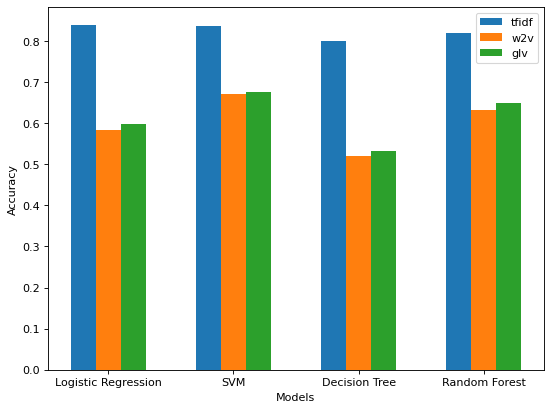

In [54]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
X=['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']

allAcc = accuracylr+accuracysvm+accuracydt+accuracyrf
tfidf = [accuracylr[0], accuracysvm[0], accuracydt[0], accuracyrf[0]]
w2v = [accuracylr[1], accuracysvm[1], accuracydt[1], accuracyrf[1]]
glv = [accuracylr[2], accuracysvm[2], accuracydt[2], accuracyrf[2]]


X_axis = np.arange(len(X))
plt.bar(X_axis-0.2,tfidf,0.2, label='tfidf')
plt.bar(X_axis,w2v,0.2, label='w2v')
plt.bar(X_axis+0.2,glv,0.2, label='glv')

plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.show()